# Kütüphanelerin Yüklenmesi ve Verinin Alınması

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Makine öğrenmesi modelleri ve metrikleri için sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

file_path = '/content/drive/MyDrive/Colab Notebooks/VM ÖDEV/finalemlak2.xlsx'

df = pd.read_excel(file_path)
df.head()


,price,district,county,residence,room,livingRoom,bathRoom,age,heating,fuel,...,grossSqm,bina_kat_sayisi,daire_kati,kuzey,guney,dogu,bati,goldeniz,bahceli,havuzlu
0,138000000,Manavpınarı,Karasu,Bahçe Dubleksi,7,2,4,0,Klima,Doğalgaz,...,3609,2,1,0,1,0,1,1,0,1
1,130000000,Adliye,Arifiye,Bahçe Dubleksi,22,0,0,0,Merkezi Sistem,Doğalgaz,...,1700,2,1,1,0,0,1,0,0,1
2,85000000,Kırkpınar Soğuksu,Sapanca,Dubleks,13,1,9,2,Kombi,Doğalgaz,...,796,3,1,0,0,1,1,0,0,1
3,78000000,Rüstempasa,Sapanca,Tripleks,4,1,3,3,Kombi,Doğalgaz,...,250,3,1,1,1,0,0,0,0,0
4,73000000,Kurtköy Dibektaş,Sapanca,Bahçe Dubleksi,5,1,3,21,Kombi,Doğalgaz,...,380,3,1,1,1,1,1,0,0,1


# Eksik Değer ve Veri Tipi Kontrolü
Eksik değerler modelin performansını düşürebileceği için bu adımda eksik değer kontrolü yaptım. Kategorik sütunlar string (object), sayısal sütunlar ise int/float olarak gelmeli.


In [ ]:
# Eksik değer var mı kontrol ettim yoktu
df.isnull().sum()

# Veri tiplerine baktığımda furnished booldu
df.dtypes

# regresyon tipi karar ağacı sayısal verilerle iyi çalıştığı için
# bool veri tipine sahip sütunları 0-1 olarak sayısala çeviriyorum,
# böylece model bu sütunları da sayısal olarak işleyebilecek.
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)
df.head()

,price,district,county,residence,room,livingRoom,bathRoom,age,heating,fuel,...,grossSqm,bina_kat_sayisi,daire_kati,kuzey,guney,dogu,bati,goldeniz,bahceli,havuzlu
0,138000000,Manavpınarı,Karasu,Bahçe Dubleksi,7,2,4,0,Klima,Doğalgaz,...,3609,2,1,0,1,0,1,1,0,1
1,130000000,Adliye,Arifiye,Bahçe Dubleksi,22,0,0,0,Merkezi Sistem,Doğalgaz,...,1700,2,1,1,0,0,1,0,0,1
2,85000000,Kırkpınar Soğuksu,Sapanca,Dubleks,13,1,9,2,Kombi,Doğalgaz,...,796,3,1,0,0,1,1,0,0,1
3,78000000,Rüstempasa,Sapanca,Tripleks,4,1,3,3,Kombi,Doğalgaz,...,250,3,1,1,1,0,0,0,0,0
4,73000000,Kurtköy Dibektaş,Sapanca,Bahçe Dubleksi,5,1,3,21,Kombi,Doğalgaz,...,380,3,1,1,1,1,1,0,0,1


### Fiyat Sütunu için Winsorization Uygulama
Fiyat sütunundaki uç değerler, modelin performans metriklerini olumsuz etkiliyordu. Ancak IQR yöntemi ile çok fazla veri kaybı yaşandığı için, daha dengeli bir yaklaşım olan Winsorization yöntemini tercih ettim. Böylece uç değerlerin aşırı etkisi azaltılırken, veri seti büyüklüğü de korunmuş oldu.

In [ ]:
from scipy.stats.mstats import winsorize

# 'price' sütunundaki uç değerleri sınırlandırmak için Winsorization uyguluyoruz.
# Alt %2 ve üst %2'lik dilimdeki uç değerleri, bu eşiklere sabitliyoruz.

lower_limit = 0.02
upper_limit = 0.02

# Orijinal veriyi korumak için kopyasını alıyoruz
original_prices = df['price'].copy()

# Alt ve üst eşikleri hesaplıyoruz (işlem öncesi)
lower_threshold = np.quantile(original_prices, lower_limit)
upper_threshold = np.quantile(original_prices, 1 - upper_limit)

print("İŞLEM ÖNCESİ:")
print(f"Alt %2'lik değer eşiği: {lower_threshold}")
print(f"Üst %2'lik değer eşiği: {upper_threshold}")
print()

# Winsorization işlemi
df['price'] = winsorize(original_prices, limits=[lower_limit, upper_limit])

# İşlem sonrası uç değerlerin nasıl değiştiğini kontrol etmek için:
print("İŞLEM SONRASI:")
print(f"Minimum değer (Winsorize sonrası): {df['price'].min()}")
print(f"Maksimum değer (Winsorize sonrası): {df['price'].max()}")

# Artık uç değerlerin model üzerinde aşırı etkisi azaltılmış durumda.



İŞLEM ÖNCESİ:
Alt %2'lik değer eşiği: 1200000.0
Üst %2'lik değer eşiği: 20330000.00000004

İŞLEM SONRASI:
Minimum değer (Winsorize sonrası): 1200000
Maksimum değer (Winsorize sonrası): 20750000


# Kategorik Özelliklerin Nümerikleştirilmesi

Önce kategorik sütunlarımın neler olduğunda baktım ve aralarında sıralı ilişki bulunan var mı inceledim

In [ ]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print(categorical_cols)

Index(['district', 'county', 'residence', 'heating', 'fuel', 'build',
       'buildState', 'subCategory'],
      dtype='object')


###Sıralı İlişki Bulunan Sütunlar İçin Ordinal Encoding

In [ ]:
# Değer anlamında sıralı kategorik veri olduğunu düşündüğüm sadece buildState sütunu var.
df['buildState'].value_counts()
# unique değerleri ve tekrar sayıları şu şekilde:

,count
buildState,
Sıfır,1473
İkinci El,700
Yapım Aşamasında,5
Kiracılı,1


In [ ]:
# Yapım Aşamasında(5) ve Kiracılı(1) gibi çok az sayıda bulunan ve modelin genellenmesini
# bozabilecek verileri modele dahil etmemeyi tercih ettim.
df = df[~df['buildState'].isin(['Yapım Aşamasında', 'Kiracılı'])].copy()

# 'buildState' sütununda sıralı bir ilişki olduğu için ordinal encoding uyguluyorum.
# Sıfır konutlar genelde daha yeni ve değerli olduğu için daha yüksek bir değer verdim.
df.loc[:, 'buildState'] = df['buildState'].map({'İkinci El': 1, 'Sıfır': 2})



### Sıralı İlişki Bulunmayanlar İçin One-Hot Encoding

In [ ]:
# 'district', 'county', 'residence', 'heating', 'fuel', 'build', 'subCategory'
# Bu sütunlar arasında sıralı bir ilişki bulunmadığı için One-Hot Encoding yöntemi kullanarak
# her bir kategoriyi ayrı bir sütun haline getirdim

one_hot_cols = ['residence', 'heating', 'fuel', 'build', 'subCategory']

# One-Hot Encoding işlemi
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

# Sütun çokluğu model başarısını kötü etkilediği için drop_first=True kullandım
# Bu özellikle ilk sütun modelden siliniyor 3 sütun varsa 2 sütuna 0 girildiyse mecburi olarak kalan sütun 1 olacağından hareketle bu özellik bulunmuş
# Böylece gereksiz bilgi tekrarından kaçınarak sütun sayısını biraz azaltmış oldum.

In [ ]:
# Encoding işlemleri sonucunda modelin kullanacağı toplam sütun sayısı 60 oldu. Önceden hepsini one hot yaptığımda 286 idi.
print(f"Sütun sayısı: {df.shape[1]}")

Sütun sayısı: 60


# Encoding İçin Yeni Fikir
İlçe ve mahalleleri one hot encoding yaptığımda önceki çalışmalarımda başarı inanılmaz düştü ama **label encoding yapmak da mantıksız** çünkü sayılar sırasız atansa da model sayılar arası büyüklük farkını anlamlı zannediyor.

# Bulduğum Çözüm
İlçe ve mahallelerin ortalama fiyatlarını alıp buna göre **ordinary encoding** yapılabilir. Korelasyon grafiği çizdiğimde mesela Sapancadaki evlerin fiyatı daha yüksek çıkmıştı buradan aklıma geldi.

In [ ]:
# İLÇELERİN ORTALAMA FİYATLARI
county_price_table = df.groupby('county')['price'].mean().sort_values(ascending=False).reset_index()
county_price_table.columns = ['İlçe', 'Ortalama Fiyat (TL)']
display(county_price_table)


,İlçe,Ortalama Fiyat (TL)
0,Sapanca,1.187292e+07
1,Karapürçek,8.000000e+06
2,Geyve,7.172206e+06
3,Akyazı,6.750133e+06
4,Taraklı,6.350000e+06
5,Serdivan,6.216361e+06
6,Hendek,5.429732e+06
7,Kocaali,5.074021e+06
8,Erenler,4.785978e+06
9,Kaynarca,4.395000e+06


In [ ]:
district_price_table = df.groupby('district')['price'].mean().sort_values(ascending=False).reset_index()
district_price_table.columns = ['Mahalle', 'Ortalama Fiyat (TL)']
display(district_price_table)


,Mahalle,Ortalama Fiyat (TL)
0,Bıçkıatik,20750000.0
1,Manavpınarı,20750000.0
2,Kurtköy Fatih,20750000.0
3,Kuruçeşme,20750000.0
4,Şeyhköy,20750000.0
...,...,...
207,Hacıyakup,1200000.0
208,Harkköy,1200000.0
209,Pınarlı,1200000.0
210,Kaynarca (Akarlar),1200000.0


### İlçe ve Mahalle için Ordinary Encoding

In [ ]:
# İlçe (county) bazında ortalama fiyatları hesaplayıp sıralama
county_price_order = df.groupby('county')['price'].mean().sort_values().reset_index()
county_price_order['county_encoded'] = county_price_order.index

# İlçeleri fiyat ortalamasına göre encode etme
df['county_encoded'] = df['county'].map(dict(zip(county_price_order['county'], county_price_order['county_encoded'])))

# Aynı işlemi mahalle (district) için yapalım
district_price_order = df.groupby('district')['price'].mean().sort_values().reset_index()
district_price_order['district_encoded'] = district_price_order.index

# Mahalleleri encode et
df['district_encoded'] = df['district'].map(dict(zip(district_price_order['district'], district_price_order['district_encoded'])))

# Artık orijinal string sütunlara ihtiyacımız kalmadı
df.drop(['county', 'district'], axis=1, inplace=True)


# REGRESYON KARAR AĞACI OLUŞTURMA

Hedef değişkenimiz "price" sayısal bir sütun olduğundan sınıflandırma ağacı değil regresyon ağacı kullanıyoruz.

Derste CART (Classification and Regression Trees) görürken slaytlardaki örneklerimiz hep sınıflandırma üzerineydi.

Bu yüzden ayrılma kriterlerinde de Gini indeksi ve entropi kullanıyorduk.

Regresyon modelinde kullanılan ayrılma ölçütü ise varyans azalmasıdır.

**Her bölünme (split), hedef değişkenin gruplar içindeki varyansını azaltacak şekilde seçilir. Varyans, verinin ne kadar "dağıldığını" gösteren bir ölçüdür. Varyans ne kadar düşükse, o gruptaki değerler birbirine daha yakındır = daha anlamlı tahmin yapılabilir.**

Örnek

Diyelim ki ilk bölünme netSqm < 100 olarak yapıldı.

Bu durumda:

netSqm < 100 olan evler bir gruba,

netSqm >= 100 olan evler diğer gruba alınır.

Bu iki grup içinde fiyatların **varyansı daha düşük oluyorsa, yani gruplar homojenleşmişse**, bu bölünme iyi bir bölünmedir ve uygulanır.

Ağaç büyüdükçe, **her dal daha homojen fiyat tahminleri yapan gruplara dönüşür**.

# Modelin Oluşturulması

### Özelliklerin ve Hedef Sütunun Ayrımı

In [ ]:
X = df.drop('price', axis=1) # Özellik sütunları
y = df['price'] # Hedef

### Eğitim ve Test Ayrımı
Eğitim %80 ve test %20 olarak aldım

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Varsayılan Parametrelerle Modelin Eğitimi

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Karar ağacı modeli, varsayılan parametrelerle
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

### Tahmin ve Başarı Metrikleri

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Tahminleri yap
y_pred = tree_model.predict(X_test)

# Başarı metriklerini hesapla
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Sonuçları yazdır
print(f"Mean Absolute Error (MAE): {mae:,.0f} TL")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f} %")
print(f"Root Mean Squared Error (RMSE): {rmse:,.0f} TL")
print(f"R-squared (R²): {r2:.4f}")



Mean Absolute Error (MAE): 1,179,512 TL
Mean Absolute Percentage Error (MAPE): 26.89 %
Root Mean Squared Error (RMSE): 2,182,952 TL
R-squared (R²): 0.6909


SONUÇLAR: İlçe ve mahalleyi one hot encoding ile dönüştürdüğüme göre ÇOK ÇOK daha iyi. Ama kesinlikle ÇOK ÇOK daha gelişmeli.

# İlk Optimizasyon Denemesi

### max_depth ayarı
Karar ağaçları çok derin olursa:

Eğitim verisine aşırı uyum sağlar (overfitting)

Gerçek veri karşısında kötü tahminler yapar

Bu yüzden ağacın maksimum derinliğini sınırlamak genellikle en temel iyileştirme yöntemidir.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Farklı derinliklerdeki ağaçların performansını test edelim
depth_scores = {}

for depth in range(2, 21):  # 2'den 20'ye kadar denedim
    model = DecisionTreeRegressor(max_depth=depth, random_state=42)
    # Negatif ortalama kare hata üzerinden 5 katlı çapraz doğrulama
    # crossvalscore en büyük skoru seçer ama MSE nin küçük olması gerek o yüzden negatifini alıyoruz
    scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-scores) # negatifini aldığımız için ters işaretlisine çeviriyoruz
    depth_scores[depth] = rmse_scores.mean()

# En iyi derinliği yazdırma
best_depth = min(depth_scores, key=depth_scores.get)
print(f"En iyi ortalama RMSE {depth_scores[best_depth]:,.0f} TL ile max_depth = {best_depth}")


En iyi ortalama RMSE 2,068,805 TL ile max_depth = 6


### Yeni Model

Bu model, max_depth=6 değeriyle optimize edilmiştir.
Çapraz geçerlilik ile en düşük RMSE değerini verdiği için bu derinlik seçilmiştir.


In [ ]:
# Yeni model: max_depth = 6 ile karar ağacı
best_tree = DecisionTreeRegressor(max_depth=6, random_state=42)
best_tree.fit(X_train, y_train)

# Tahmin
y_pred_best = best_tree.predict(X_test)

# Başarı metrikleri
mae = mean_absolute_error(y_test, y_pred_best)
mape = np.mean(np.abs((y_test - y_pred_best) / y_test)) * 100
rmse = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2 = r2_score(y_test, y_pred_best)

print(f"Mean Absolute Error (MAE): {mae:,.0f} TL")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f} %")
print(f"Root Mean Squared Error (RMSE): {rmse:,.0f} TL")
print(f"R-squared (R²): {r2:.4f}")


Mean Absolute Error (MAE): 1,211,558 TL
Mean Absolute Percentage Error (MAPE): 27.43 %
Root Mean Squared Error (RMSE): 2,163,242 TL
R-squared (R²): 0.6965


SONUÇ: Bütün değerlerde küçük de olsa iyileşme oldu.


# Özelliklerin Fiyat ile Korelasyonlarının İncelenmesi

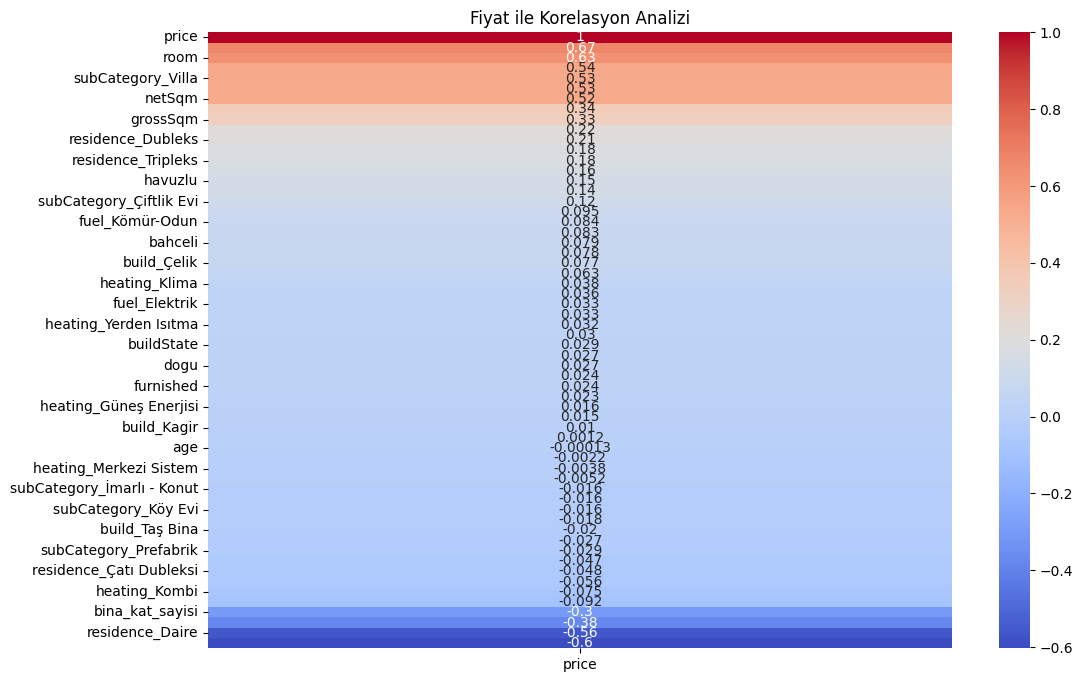

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sayısal sütunların fiyat ile korelasyonuna bakalım
corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr[['price']].sort_values(by='price', ascending=False), annot=True, cmap='coolwarm')
plt.title('Fiyat ile Korelasyon Analizi')
plt.show()


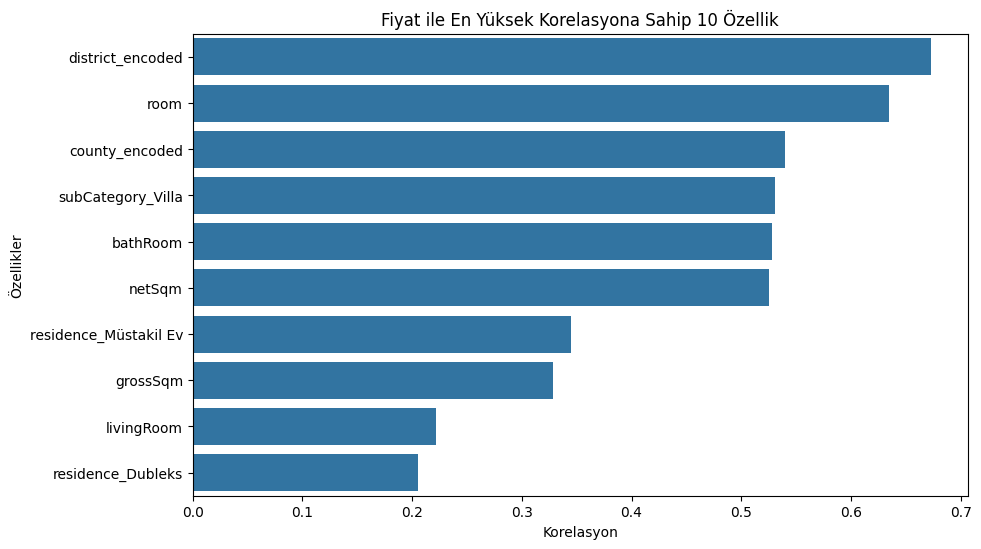

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# price değişkeni ile korelasyonları al ve sıralar
correlation_with_price = df.corr(numeric_only=True)['price'].sort_values(ascending=False)

# price dışındaki en yüksek korelasyona sahip 10 değişkeni seç
top_corr = correlation_with_price.drop('price').head(10)

# Görselleştir
plt.figure(figsize=(10, 6))
sns.barplot(x=top_corr.values, y=top_corr.index)
plt.title("Fiyat ile En Yüksek Korelasyona Sahip 10 Özellik")
plt.xlabel("Korelasyon")
plt.ylabel("Özellikler")
plt.show()


### Fiyat Dağılımının İncelenmesi ve Log Dönüşümü Uygulanması

Bu hücrede fiyat değişkeninin dağılımını görselleştirip sağa çarpıklığını inceleyeceğiz.
Ardından log dönüşümü uygulayarak dağılımın nasıl değiştiğini göstereceğiz.


#### Orijinal Fiyat Dağılımı Grafikleri

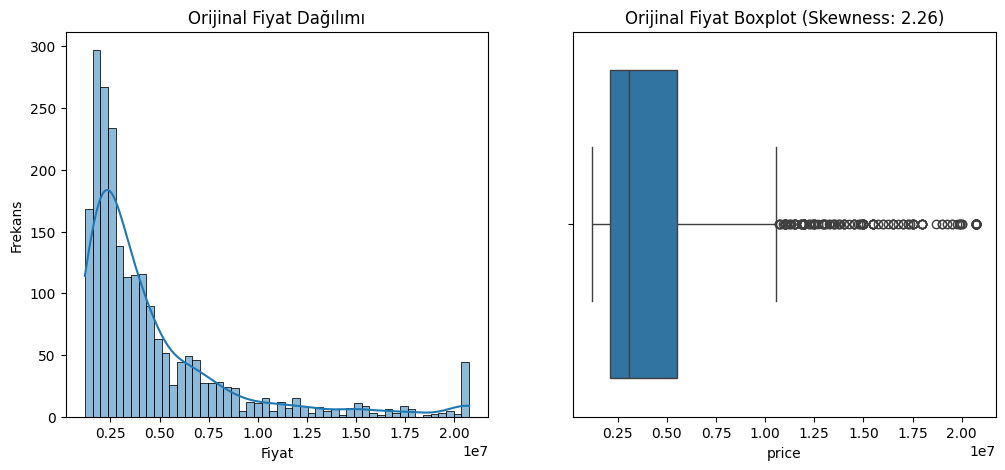

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Orijinal Fiyat Dağılımı")
plt.xlabel("Fiyat")
plt.ylabel("Frekans")

skewness_original = df['price'].skew()

plt.subplot(1,2,2)
sns.boxplot(x=df['price'])
plt.title(f"Orijinal Fiyat Boxplot (Skewness: {skewness_original:.2f})")

plt.show()


####Sağa doğru çok belirgin bir çarpıklık var
####Frekansı az olan çok yüksek fiyatlı veriler modelin başarısını olumsuz etkiliyor


### Log Dönüşümü

Log Dönüşümü ile fiyat değerlerini sıkıştırıp çarpıklığın keskinliğini yumuşatmaya çalışacağım. Model daha küçük verilerle daha anlamlı çalışacak.

In [ ]:
import numpy as np

# Log dönüşümü uygulanıyor. np.log1p kullanımı fiyatın sıfır olma ihtimaline karşı güvenlidir.
df['log_price'] = np.log1p(df['price'])


### Log Uygulanmış Grafikler

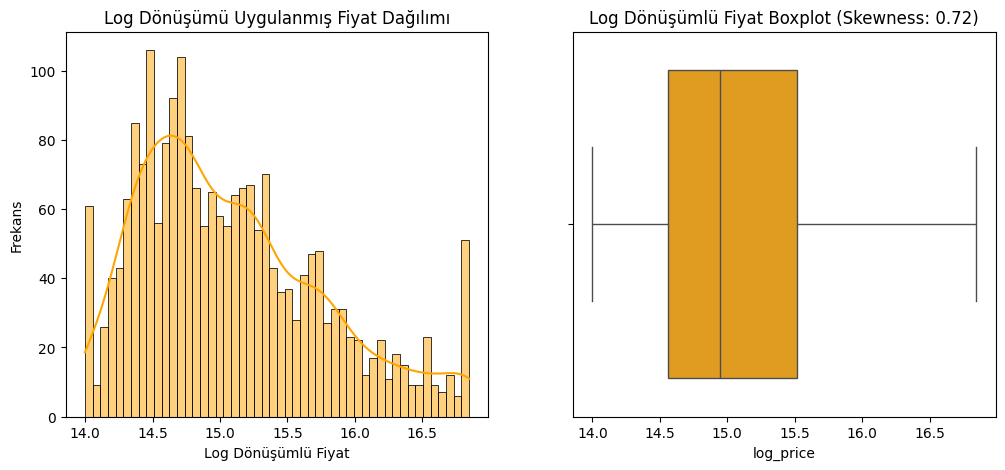

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df['log_price'], bins=50, kde=True, color='orange')
plt.title("Log Dönüşümü Uygulanmış Fiyat Dağılımı")
plt.xlabel("Log Dönüşümlü Fiyat")
plt.ylabel("Frekans")

skewness_log = df['log_price'].skew()

plt.subplot(1,2,2)
sns.boxplot(x=df['log_price'], color='orange')
plt.title(f"Log Dönüşümlü Fiyat Boxplot (Skewness: {skewness_log:.2f})")

plt.show()


###Skewness Değerleri

In [ ]:
print(f"Orijinal fiyat dağılımının sağa çarpıklık değeri: {skewness_original:.2f}")
print(f"Log dönüşümü sonrası sağa çarpıklık değeri: {skewness_log:.2f}")


Orijinal fiyat dağılımının sağa çarpıklık değeri: 2.26
Log dönüşümü sonrası sağa çarpıklık değeri: 0.72


Bu dönüşüm aşırı büyük fiyat değerlerinin etkisini azaltarak modelin daha dengeli öğrenmesini sağlayacak

## Değişiklikler Sonrası Yeni Model

In [ ]:
# Model için bağımlı ve bağımsız değişkenleri seçiyorum
X = df.drop(columns=['price', 'log_price'])  # Fiyat sütunlarını çıkarıyorum
y = df['log_price']  # Log dönüşümlü fiyat hedef değişkenim

# Eğitim ve test verisini %80-%20 olarak ayırıyorum ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Karar ağacı regresyon modelini oluşturuyorum
tree_model = DecisionTreeRegressor(max_depth=6, random_state=42)

# Modeli log dönüşümlü hedef değişken ile eğitiyorum
tree_model.fit(X_train, y_train)

# Test verisi için tahmin yapıyorum
y_pred_log = tree_model.predict(X_test)

# Tahminlerin log dönüşümünün tersini alarak orijinal fiyat ölçeğine çeviriyorum ---
y_pred_original = np.expm1(y_pred_log)  # expm1(x) = exp(x) - 1

# Testteki gerçek fiyatları da orijinaline çeviriyorum ---
y_test_original = np.expm1(y_test)

# MAPE fonksiyonunu tanımlıyorum
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# --- Orijinal fiyatlar üzerinden modelin başarısını ölçüyorum ---
mae = mean_absolute_error(y_test_original, y_pred_original)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
r2 = r2_score(y_test_original, y_pred_original)
mape = mean_absolute_percentage_error(y_test_original, y_pred_original)

# --- Sonuçları yazdırıyorum ---
print(f"Mean Absolute Error (MAE): {mae:.0f} TL")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f} %")
print(f"Root Mean Squared Error (RMSE): {rmse:.0f} TL")
print(f"R-squared (R²): {r2:.4f}")

Mean Absolute Error (MAE): 1171568 TL
Mean Absolute Percentage Error (MAPE): 26.44 %
Root Mean Squared Error (RMSE): 2042913 TL
R-squared (R²): 0.7293


SONUÇ: Küçük bir iyileşme oldu

### Tekrardan Optimizasyon

#### Bu sefer hem log dönüşümü hem de GridSearch kullanacağım
#### GridSearch model için en iyi hiperparametreleri ayarlıyor

In [ ]:
from sklearn.model_selection import GridSearchCV

# Modelde kullanacağım bağımsız değişkenler ve hedef değişkeni log'lu olarak tanımlıyorum
X = df.drop(columns=['price','log_price'])
y = np.log1p(df['price'])  # log dönüşümü (log1p: log(1 + x) ile sıfıra karşı daha dayanıklı)

# Eğitim ve test verilerini ayırıyorum
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hiperparametre aralığını belirliyorum — veri setimin büyüklüğüne uygun şekilde
param_grid = {
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4]
}

# GridSearchCV ile en iyi karar ağacı modelini arıyorum
grid_search = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # hatayı minimize etmeyi hedefliyorum
    cv=5,
    n_jobs=-1
)

# Modeli eğitiyorum
grid_search.fit(X_train, y_train)

# En iyi parametreleri alıyorum
best_params = grid_search.best_params_
print("En iyi hiperparametreler:", best_params)

# En iyi modeli kullanarak test verisi üzerinde tahmin yapıyorum
best_model = grid_search.best_estimator_
y_pred_log = best_model.predict(X_test)

# Log dönüşümünü geri alarak gerçek fiyat tahminlerini elde ediyorum
y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(y_pred_log)

# Değerlendirme metriklerini hesaplıyorum
mae = mean_absolute_error(y_test_exp, y_pred_exp)
mape = np.mean(np.abs((y_test_exp - y_pred_exp) / y_test_exp)) * 100
rmse = np.sqrt(mean_squared_error(y_test_exp, y_pred_exp))
r2 = r2_score(y_test_exp, y_pred_exp)

# Sonuçları yazdırıyorum
print(f"Mean Absolute Error (MAE): {mae:,.0f} TL")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f} %")
print(f"Root Mean Squared Error (RMSE): {rmse:,.0f} TL")
print(f"R-squared (R²): {r2:.4f}")


En iyi hiperparametreler: {'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 10}
Mean Absolute Error (MAE): 1,178,968 TL
Mean Absolute Percentage Error (MAPE): 26.56 %
Root Mean Squared Error (RMSE): 2,043,938 TL
R-squared (R²): 0.7290


SONUÇ: Anlamlı bir değişim olmadı.

## Son Durum Değerlendirmesi

### Gerçek vs Tahmin Değerler

In [ ]:

# DataFrame oluşturuluyor
comparison_df = pd.DataFrame({
    'Gerçek Fiyat (TL)': y_test_exp[:10],
    'Tahmin Edilen Fiyat (TL)': y_pred_exp[:10]
})

# Tahmin edilen fiyatları tam sayı ve binlik ayraçlı stringe dönüştür
comparison_df['Tahmin Edilen Fiyat (TL)'] = comparison_df['Tahmin Edilen Fiyat (TL)'].apply(lambda x: f"{x:,.0f}")

# Gerçek fiyatları da tam sayı ve binlik ayraçlı yapalım (daha okunaklı olur)
comparison_df['Gerçek Fiyat (TL)'] = comparison_df['Gerçek Fiyat (TL)'].apply(lambda x: f"{x:,.0f}")

print(comparison_df)


     Gerçek Fiyat (TL) Tahmin Edilen Fiyat (TL)
283          8,000,000                5,246,030
1666         2,050,000                2,091,728
2030         1,550,000                1,685,780
624          4,800,000                3,017,413
2091         1,400,000                2,770,092
1417         2,450,000                2,091,728
523          5,550,000                6,311,040
170         11,200,000                4,301,220
1781         1,882,000                2,091,728
512          5,750,000                5,474,506


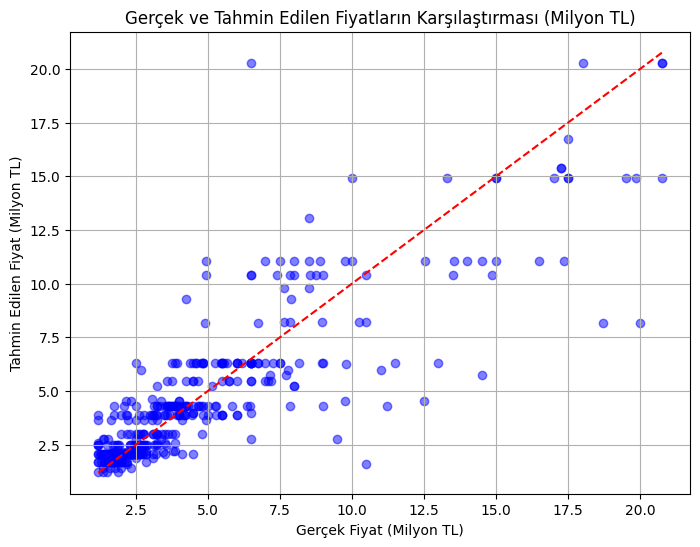

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test_exp / 1_000_000, y_pred_exp / 1_000_000, alpha=0.5, color='blue')
plt.plot([min(y_test_exp) / 1_000_000, max(y_test_exp) / 1_000_000],
         [min(y_test_exp) / 1_000_000, max(y_test_exp) / 1_000_000],
         color='red', linestyle='--')
plt.xlabel('Gerçek Fiyat (Milyon TL)')
plt.ylabel('Tahmin Edilen Fiyat (Milyon TL)')
plt.title('Gerçek ve Tahmin Edilen Fiyatların Karşılaştırması (Milyon TL)')
plt.grid(True)
plt.show()



# Yeniden Optimizasyon Denemesi

One hot encodinglerden dolayı sütun sayısı 60 olmuştu, bu sefer önceki modelimden farklı olarak **target label encoding ve Z-Skoru ile filtreleme** yöntemi kullanacağım.

In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/VM ÖDEV/finalemlak2.xlsx'

df = pd.read_excel(file_path)

### Yeni Bir Encoding Yaklaşımı
Kategorik sütunları encoding yaparken, label encodingdeki gibi rastgele sayılar vermesini istemedim. İçindeki benzersiz değerleri önce groupby ile gruplandırıp sonra her grubun ortalama fiyatını buldurdum, sonra da encodingde bu gruplara verilecek sayıları ortalamalarının büyüklüğüne göre verdim. Literatürde buna target encoding / mean encoding deniyormuş, literatürde olduğunu bilmeden kullandım.

Bir önceki modelde sadece ilçe ve mahalle için bu yöntemi kullanmışken bu modelde tüm kategorik veriler için bu yöntemi kullandım.

In [ ]:
# Kategorik sütunları belirleyip değişkene atadım
cat_cols = df.select_dtypes(include=['object', 'bool']).columns.tolist()

# Encoding fonksiyonu
def target_based_encoding(df, cat_columns, target):
    df_encoded = df.copy()
    encoding_maps = {}

    for col in cat_columns:
        ordered_avg = df_encoded.groupby(col)[target].mean().sort_values().reset_index()
        ordered_avg[f'{col}_encoded'] = ordered_avg.index
        encoding_maps[col] = dict(zip(ordered_avg[col], ordered_avg[f'{col}_encoded']))
        df_encoded[f'{col}_encoded'] = df_encoded[col].map(encoding_maps[col])

    return df_encoded, encoding_maps

# Encoding işlemi
df_encoded, encoding_maps = target_based_encoding(df, cat_cols, 'price')

# Orijinal kategorik sütunları silebiliriz
df_encoded.drop(columns=cat_cols, inplace=True)

# Kontrol
df_encoded.head()


,price,room,livingRoom,bathRoom,age,netSqm,grossSqm,bina_kat_sayisi,daire_kati,kuzey,...,havuzlu,district_encoded,county_encoded,residence_encoded,heating_encoded,fuel_encoded,build_encoded,buildState_encoded,furnished_encoded,subCategory_encoded
0,138000000,7,2,4,0,3608,3609,2,1,0,...,1,211,3,7,10,1,6,1,1,7
1,130000000,22,0,0,0,1600,1700,2,1,1,...,1,210,12,7,9,1,2,1,0,13
2,85000000,13,1,9,2,596,796,3,1,0,...,1,206,17,4,2,1,2,1,1,11
3,78000000,4,1,3,3,180,250,3,1,1,...,0,180,17,3,2,1,2,1,0,11
4,73000000,5,1,3,21,320,380,3,1,1,...,1,200,17,7,2,1,2,1,0,11


### Z-Skoru ile Filtreleme

In [ ]:
from scipy.stats import zscore

def remove_price_outliers_z(df, threshold=2.5):
    """
    price sütunundaki z-skoru yüksek olan uç değerleri temizler.
    threshold: kaç std sapma dışı silineceğini belirtir,
    genelde 3 kullanılırken ben 2.5 kullandım öyle daha optimize sonuç verdi
    """
    df_clean = df.copy()

    # Z-skorunu hesapla
    z_scores = zscore(df_clean['price'])

    # Mutlak değeri eşik değerden küçük olanları tut
    df_clean = df_clean[np.abs(z_scores) < threshold]

    # Bilgi ver
    print("Z-skor ile filtrelendi.")
    print(f"Kalan satır sayısı: {df_clean.shape[0]}")
    print(f"Fiyat aralığı: min = {df_clean['price'].min():,.0f} TL, max = {df_clean['price'].max():,.0f} TL")

    return df_clean

# Kullanım
df_filtered = remove_price_outliers_z(df_encoded, threshold=2.5)


Z-skor temizliği uygulandı.
Kalan satır sayısı: 2139
Fiyat aralığı: min = 19,000 TL, max = 21,000,000 TL


In [ ]:
# 19 bin çok küçük geldiğinden diğer en küçük değerleri görmek istedim
min_10_prices = df_filtered['price'].drop_duplicates().sort_values().head(10)

# Sonucu yazdır
print("En düşük 10 benzersiz fiyat:")
print(min_10_prices.to_string(index=False))


En düşük 10 benzersiz fiyat:
 19000
190000
500000
650000
700000
750000
775000
800000
850000
885000


In [ ]:
# 190000 TL ve altındaki fiyatları çıkar
df_filtered = df_filtered[df_filtered['price'] > 190000]

# Kalan satır sayısını göster
print("Kalan satır sayısı:", df_filtered.shape[0])


Kalan satır sayısı: 2137


## YENİ MODELİN KURULMASI

### LOG DÖNÜŞÜMÜ

In [ ]:
# price sütununa log dönüşümü uygula ve yeni sütun oluştur
df_filtered['log_price'] = np.log(df_filtered['price'])

# Kontrol: minimum, maksimum değerler
print("Log dönüşümü sonrası fiyat aralığı:")
print(df_filtered['log_price'].describe())


Log dönüşümü sonrası fiyat aralığı:
count    2137.000000
mean       15.044995
std         0.655437
min        13.122363
25%        14.557448
50%        14.930652
75%        15.454507
max        16.860033
Name: log_price, dtype: float64


### EĞİTİM-TEST AYRIMI

In [ ]:


# Hedef değişken (log dönüşümlü fiyat)
y = df_filtered['log_price']

# Girdi değişkenleri: price ve log_price hariç tüm sayısal ve encoding yapılmış sütunlar
X = df_filtered.drop(['price', 'log_price'], axis=1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Eğitim veri seti boyutu:", X_train.shape[0])
print("Test veri seti boyutu:", X_test.shape[0])


Eğitim veri seti boyutu: 1709
Test veri seti boyutu: 428


## GRİDSEARCH İLE EN İYİ HİPERPARAMETRELERİN BELİRLENMESİ

In [ ]:
# Model nesnesi
dt = DecisionTreeRegressor(random_state=42)

# Hiperparametre aralıkları
param_grid = {
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}

# GridSearchCV ile en iyi parametreleri ara (5 katlı)
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=5, n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

print("En iyi hiperparametreler:", grid_search.best_params_)


Fitting 5 folds for each of 80 candidates, totalling 400 fits
En iyi hiperparametreler: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 20}


## EN İYİ PARAMETRELERLE TAHMİN VE BAŞARIMLAR

In [ ]:
# En iyi modeli al
best_model = grid_search.best_estimator_

# Tahmin yap
y_pred = best_model.predict(X_test)

# Log dönüşümden geri dön (tahminler ve gerçek değerler için)
y_pred_exp = np.exp(y_pred)
y_test_exp = np.exp(y_test)

# Performans metrikleri
mse = mean_squared_error(y_test_exp, y_pred_exp)
mae = mean_absolute_error(y_test_exp, y_pred_exp)
r2 = r2_score(y_test_exp, y_pred_exp)

print("Model Performansı (log'dan geri çevrilmiş fiyatlar üzerinden):")
print(f"MAE: {mae:,.0f} TL")
print(f"MSE: {mse:,.0f}")
print(f"R² Skoru: {r2:.4f}")


Model Performansı (log'dan geri çevrilmiş fiyatlar üzerinden):
MAE: 911,678 TL
MSE: 2,483,321,925,969
R² Skoru: 0.7735


##ÖZELLİK SEÇİMİ




<ipython-input-145-4a9dc5a14e61>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')


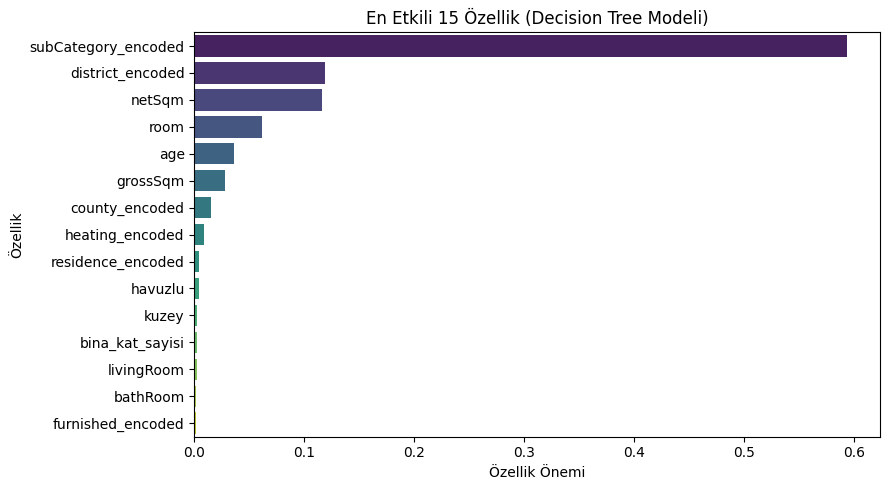

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Özelliklerin önemlerini DataFrame'e al
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_model.feature_importances_})

# Önem sırasına göre sırala
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)

# En önemli 15 özelliği al
top_features = feature_importances.head(15)

# Görselleştir
plt.figure(figsize=(9, 5))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
plt.title('En Etkili 15 Özellik (Decision Tree Modeli)')
plt.xlabel('Özellik Önemi')
plt.ylabel('Özellik')
plt.tight_layout()
plt.show()


#####Bu grafik beni çok şaşırttı açıkçası ama Regresyon Karar Ağaçları için normal bir durummuş. Çok güçlü korelasyon gösteren bir iki değişkene göre ilk düğümler oluşur ve böyle dengesiz bir grafik oluşabilirmiş.
#####Karar Ağacı şemasında da göreceğiz ki ağacın verdiği ilk karar subCategory sorgulamasıyla gerçekleşiyor. Kararı en çok etkileyen değişken de doğal olarak kendisi.
##### Sonraki düğümleri de bu grafiğe uygun şekilde netSqm ve district takip ediyor.

## ÖZELLİK SEÇİMİ İLE YENİDEN MODEL OLUŞTURULMASI

En çok etkileyen ilk 15 özelliği aldım. Yine Log dönüşümlü fiyat ve GridSearch yöntemi kullandım. Büyük bir değişim göremedim ama yine de model iyileşti.

In [ ]:
# Özellik listesi (önem sırasına göre ilk 15)
selected_features = [
    'subCategory_encoded', 'netSqm', 'district_encoded', 'room', 'age',
    'grossSqm', 'county_encoded', 'bina_kat_sayisi', 'havuzlu',
    'fuel_encoded', 'kuzey', 'buildState_encoded', 'heating_encoded',
    'residence_encoded', 'bahceli'
]

# Girdi ve hedef değişken
X = df_filtered[selected_features]
y = df_filtered['log_price']  # log dönüşümlü fiyat

# Eğitim ve test verilerine ayır
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Model nesnesi
dt = DecisionTreeRegressor(random_state=42)

# Hiperparametre aralıkları
param_grid = {
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}

# GridSearchCV ile hiperparametre arama
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Model eğitimi
grid_search.fit(X_train, y_train)

# En iyi modeli al
best_model = grid_search.best_estimator_

# Test setinde tahmin yap
y_pred = best_model.predict(X_test)

# Log'dan orijinal fiyata geri dönüş
y_pred_exp = np.exp(y_pred)
y_test_exp = np.exp(y_test)

# Performans metriklerini hesapla
mae = mean_absolute_error(y_test_exp, y_pred_exp)
mse = mean_squared_error(y_test_exp, y_pred_exp)
r2 = r2_score(y_test_exp, y_pred_exp)
# MAPE hesaplama
mape = np.mean(np.abs((y_test_exp - y_pred_exp) / y_test_exp)) * 100

# Sonuçları yazdır
print("Model Performansı (Sadeleştirilmiş Özellik Seti ile):")
print(f"MAE : {mae:,.0f} TL")
print(f"MSE : {mse:,.0f}")
print(f"R²  : {r2:.4f}")
print(f"MAPE: {mape:.2f}%")
print("En iyi hiperparametreler:", grid_search.best_params_)



Fitting 5 folds for each of 80 candidates, totalling 400 fits
Model Performansı (Sadeleştirilmiş Özellik Seti ile):
MAE : 993,105 TL
MSE : 2,915,988,548,101
R²  : 0.7340
MAPE: 22.74%
En iyi hiperparametreler: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 20}


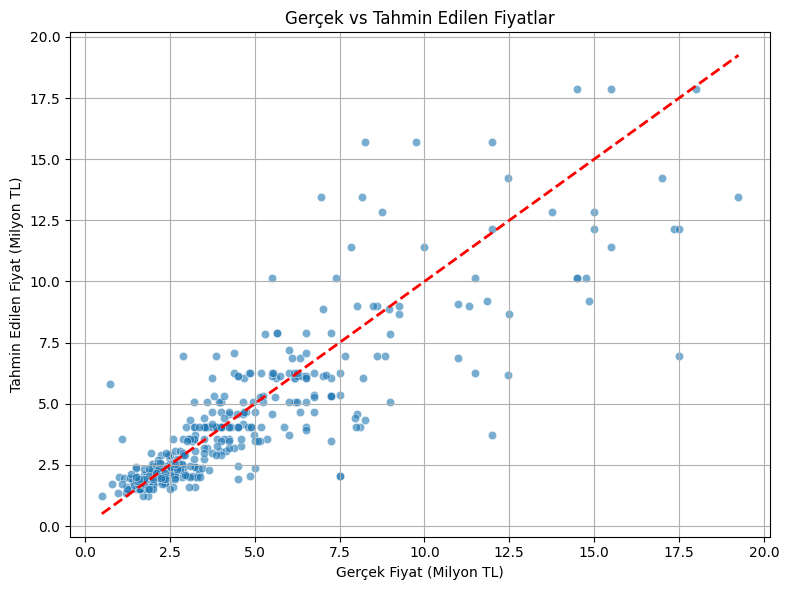

In [ ]:
# Logdan normale döndürdüm ve kolaylık olsun diye grafikte milyon olarak gösterdim
y_pred_exp = np.exp(y_pred) / 1_000_000
y_test_exp = np.exp(y_test) / 1_000_000

# Tahmin vs Gerçek değerler karşılaştırması (milyon TL cinsinden)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_exp, y=y_pred_exp, alpha=0.6)
plt.plot([y_test_exp.min(), y_test_exp.max()], [y_test_exp.min(), y_test_exp.max()], 'r--', lw=2)
plt.xlabel("Gerçek Fiyat (Milyon TL)")
plt.ylabel("Tahmin Edilen Fiyat (Milyon TL)")
plt.title("Gerçek vs Tahmin Edilen Fiyatlar")
plt.grid(True)
plt.tight_layout()
plt.show()


## Tahmin Edilen İlk 5 Örnek ve Gerçek Fiyatları

In [ ]:
# Gerçek ve tahmin edilen fiyatların orijinal hali
df_results = pd.DataFrame({
    'Gerçek Fiyat(m)': y_test_exp,
    'Tahmin Edilen Fiyat(m)': y_pred_exp
})

# İlk 5 örneği görelim
print(df_results.head(5))

      Gerçek Fiyat(m)  Tahmin Edilen Fiyat(m)
1549            2.200                2.552475
273             8.250               15.693359
478             6.000                7.203530
338             7.250                6.047394
1938            1.685                1.924154


## KARAR AĞACI ÇİZİMİ

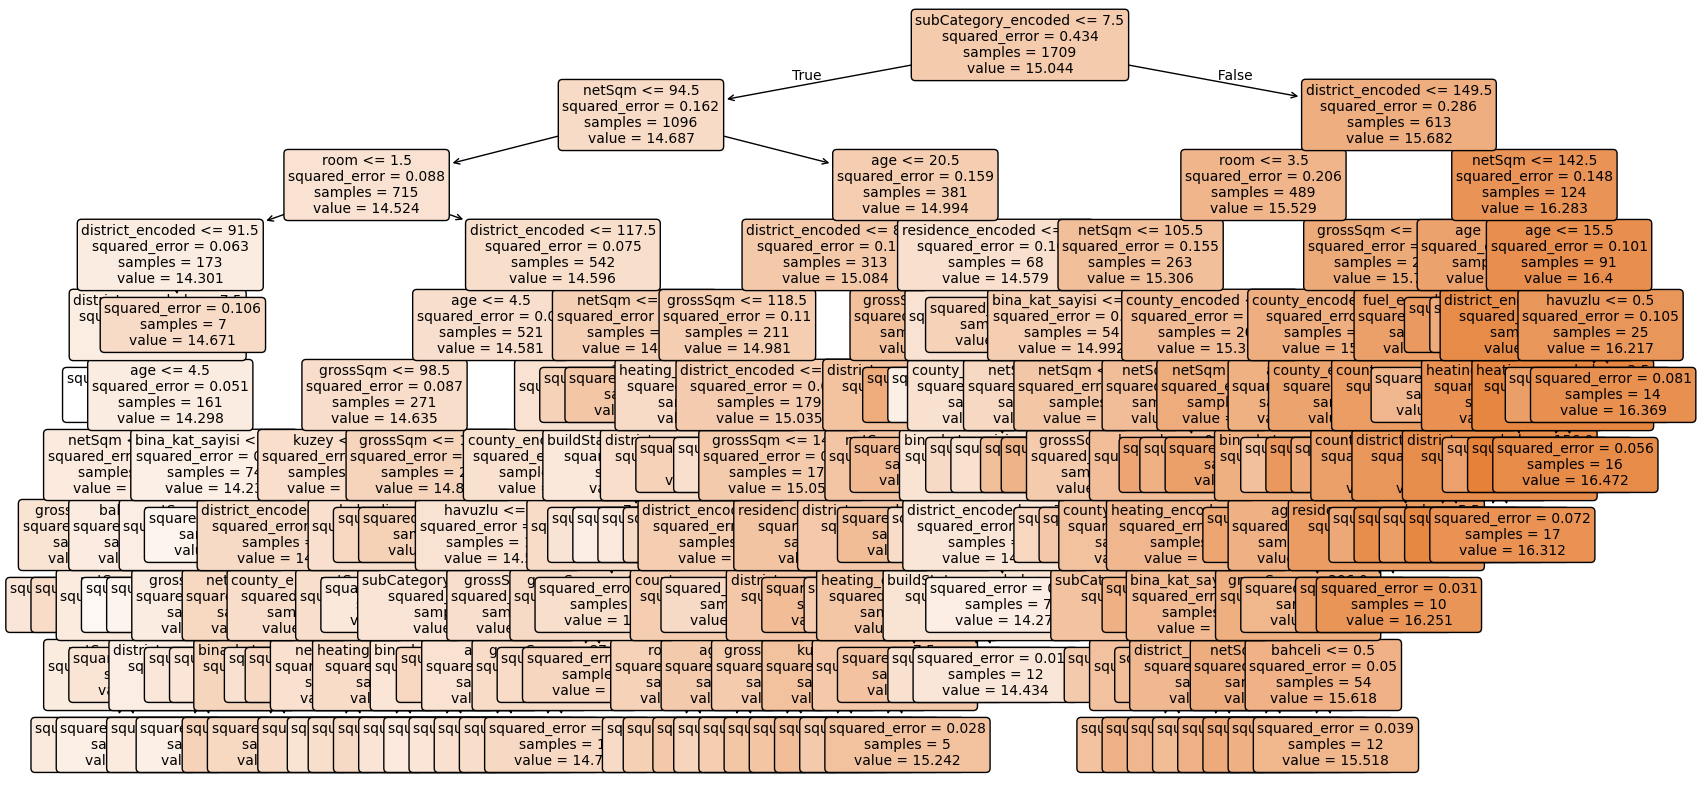

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(best_model,
          feature_names=selected_features,
          filled=True,
          rounded=True,
          fontsize=10)
plt.show()


In [ ]:
encoding_maps['subCategory']

{'Prefabrik': 0,
 'Bahçe': 1,
 'Köy Evi': 2,
 'Tarla': 3,
 'İmarlı - Konut': 4,
 'Daire': 5,
 'Konut+Ticaret': 6,
 'Yazlık': 7,
 'Müstakil Ev': 8,
 'Köşk': 9,
 'Bungalov': 10,
 'Villa': 11,
 'Bina': 12,
 'Çiftlik Evi': 13}

## KARAR AĞACI YORUMLAMASI
####İlk düğümde subCategory 7,5 tan küçük mü büyük mü diye bakıyor.
####7 buçuktan büyük olanlar: Müstakil Ev, Köşk, Bungalov, Villa, Bina, Çiftlik Evi
####Yani bunlar daha pahalı olanlar aslında


#### Squarred_error regresyon ağacında varyansı gösterir, bölünmeler oldukça düzensizliğin azalmasını, yani varyansın da azalmasını bekleriz.

####Modelimi optimizasyon için log_price ile eğittiğimden sonrasında dönüşüm yapsam bile ağaç gösteriminde eğitimdeki değeri kullandığından value'lar loglu şekilde kaldı.
#### İlk düğümde value 15.047 geldi, yani eğitim verisindeki tüm verilerin ortalama log fiyatı 15.047. Gerçek fiyata çevirdiğimde 3,444,109 TL çıkıyor.


## İSTENİLEN DEĞERLERLE BİR İLANIN TAHMİNİ

In [ ]:
def predict_price(new_input_dict):
    """
    new_input_dict: Tahmin yapılacak evin özelliklerini içeren bir sözlük
    Anahtarlar: selected_features listesinde yer alan değişken isimleri
    """
    # Yeni veri DataFrame'e dönüştürülür
    new_data = pd.DataFrame([new_input_dict])

    # Encoding yapılacak sütunlar:
    for col in encoding_maps:
        if f"{col}_encoded" in selected_features:
            try:
                new_data[f"{col}_encoded"] = new_data[col].map(encoding_maps[col])
                if pd.isnull(new_data[f"{col}_encoded"]).any():
                    raise ValueError(f"'{col}' için verilen kategori encoding haritasında yok.")
            except Exception as e:
                print(f"{col} için encoding hatası: {e}")
                return

    # Gereksiz orijinal kategorik sütunları çıkar
    for col in encoding_maps:
        if col in new_data.columns:
            new_data.drop(columns=[col], inplace=True)

    # Sadece modelin beklediği sıralı sütunları al
    new_data = new_data[selected_features]

    # Tahmin ve log'dan geri dönüş
    log_price_pred = best_model.predict(new_data)[0]
    price_pred = np.exp(log_price_pred)

    print(f"Tahmin Edilen Fiyat: {price_pred:,.0f} TL")

    return price_pred


### TAHMİN BLOĞU

In [ ]:
sample_input = {
    'subCategory': 'Daire',
    'netSqm': 90,
    'district': 'Arabacıalanı',
    'room': 3,
    'age': 5,
    'grossSqm': 135,
    'county': 'Serdivan',
    'bina_kat_sayisi': 3,
    'havuzlu': 1,
    'fuel': 'Doğalgaz',
    'kuzey': 0,
    'buildState': 'İkinci El',
    'heating': 'Kombi',
    'residence': 'Daire',
    'bahceli': 1
}

predict_price(sample_input)


Tahmin Edilen Fiyat: 3,841,387 TL


np.float64(3841387.3417337337)

## MODELE VERİLEBİLECEK DEĞERLER

In [ ]:
# Tüm encoding yapılan kategorik sütunlar ve değerleri
for col, mapping in encoding_maps.items():
    print(f"\n'{col}' sütununda modelin anlayacağı değerler:")
    for original_value in mapping.keys():
        print(f" - {original_value}")



'district' sütununda modelin anlayacağı değerler:
 - Hacıyakup
 - Harkköy
 - Pınarlı
 - Kaynarca (Akarlar)
 - Misinli
 - Mahmutbey
 - Şeyhvarmaz
 - Osmanlı
 - Gümüşoluk
 - Bacıköy
 - Yahyalar
 - Kızılcaali
 - Ağalar
 - Akçakaya
 - Hüseyinli
 - Semerciler
 - Kurtuluş
 - Şirinevler
 - Tığcılar
 - Adatepe
 - Demirler
 - Elperek
 - Ömercikler
 - Gündoğan
 - Güllük
 - Ceylandere
 - Yeşiltepe
 - Kabakoz
 - Konak
 - Yeni Cami
 - İnönü
 - Darıçayırı
 - Korucuk
 - Orta
 - Melekşesolak
 - Aziziye
 - Dilmen
 - Hanlı Merkez
 - Hırka
 - Hanlıköy
 - Gazi Süleyman Paşa
 - Yunus Emre
 - Çukurahmediye
 - Bekirpaşa
 - İhsaniye
 - Hastahane
 - Fatih
 - Beşköprü
 - Sıraköy
 - Hızırtepe
 - Karaaptiler
 - Yeni
 - Aşağı Kirazca
 - Yalı
 - Neviye
 - Tuzla
 - Kayacık
 - Göksu
 - Hacıoğlu
 - Karaosman
 - Maltepe
 - Güneşler Merkez
 - Gökgöz
 - Papuççular
 - Çilekli
 - Karasu
 - Mithatpaşa
 - Büyükhataplı
 - Küçük Söğütlü
 - Bakacak
 - Rasimpaşa
 - Erenler
 - Oruçlu
 - Alifuatpaşa
 - Tepekum
 - Gölkent
 - Arifb